In [7]:
# importations
import mne, fooof, numpy as np, pandas as pd, os, glob, sys
from mne.preprocessing import ICA
from IPython.display import display, Markdown
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import zscore

## The bit about generating TFRs

### Cleaned bit:

In [2]:
def give_me_all_tfrs(tfr, ch):
    all_tr_tfrs = dict()
    dat = tfr.copy().pick_channels([ch]).data
    for n, tr in enumerate(dat):
        all_tr_tfrs[n] = tr[0]
    return all_tr_tfrs
    

In [3]:
def give_me_tfr_dict(epochs):
    
    freqs = np.logspace(*np.log10([1, 100]), num=50)
    n_cycles = freqs / 2.  # different number of cycle per frequency


    power = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, # wtf is n_cycle?
                            return_itc=False, decim=3, n_jobs=-1,
                                              average=False)
    
    just_everything = dict()
    chs = epochs.ch_names
    i=0
    for ch in chs:
        print(f'Working on channel {ch}, {i}')
        i+=1
        just_everything[ch] = give_me_all_tfrs(power, ch)
        
        avg = np.zeros_like(just_everything[ch][0])
        for n in just_everything[ch]:
            avg += just_everything[ch][n]
        avg = avg/len(just_everything[ch])
        just_everything[ch]['avg'] = avg
        
    return just_everything

In [5]:
processed_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/'
save_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/permutations/'
def pickle_me_tfrs(sub, epochs_dir=processed_dir, save_dir=save_dir):
    files = sorted(glob.glob(f'/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/*{sub}*final*fif'))
    for block in files:
        ses_name = block.split('/')[-1][:-8]
        print(ses_name)
        epochs = mne.read_epochs(processed_dir+ses_name+'-epo.fif')
        just_everything = give_me_tfr_dict(epochs)
        with open(save_dir+ses_name+'.pkl', 'wb') as f:
            pickle.dump(just_everything, f)
        del f
        del just_everything

In [6]:
processed_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/'
save_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/permutations/'
all_subs = ['sub20', 'sub22', 'sub02']

for sub in all_subs:
    pickle_me_tfrs(sub)

sub20_ses00_final
Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses00_final-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   15.7s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s


Not setting metadata


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.8s finished


Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working on channel F1, 37
Wo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s


Not setting metadata


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.4s finished


Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working on channel F1, 37
Wo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.7s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.6s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s


Not setting metadata


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished


Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working on channel F1, 37
Wo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.0s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.8s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.7s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.6s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s


Not setting metadata


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished


Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working on channel F1, 37
Wo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.8s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.6s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s


Not setting metadata


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.0s finished


Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working on channel F1, 37
Wo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s


Not setting metadata


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.8s finished


Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working on channel F1, 37
Wo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s


Not setting metadata


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.7s finished


Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working on channel F1, 37
Wo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.7s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s


Not setting metadata


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.2s finished


Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working on channel F1, 37
Wo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s


Not setting metadata


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.1s finished


Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working on channel F1, 37
Wo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s


Not setting metadata


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.8s finished


Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working on channel F1, 37
Wo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 out of  64 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.3s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.6s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.7s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.7s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.5s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.6s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.7s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.8s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.9s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    2.1s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

In [ ]:
##############

In [371]:
processed_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/'
ses_name = 'sub22_ses03_final'
epochs = mne.read_epochs(processed_dir+ses_name+'-epo.fif')

Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub22_ses03_final-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated


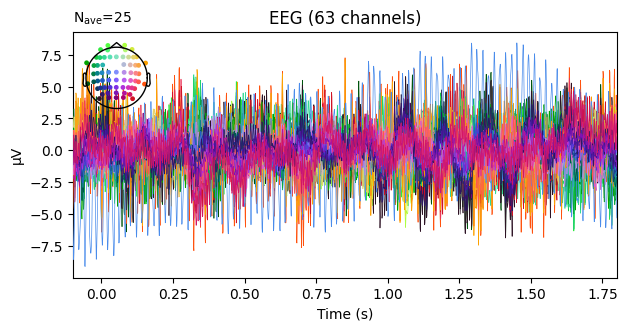

In [372]:
epochs.copy().average().plot();

In [373]:
freqs = np.logspace(*np.log10([1, 100]), num=50)
print(freqs)

[  1.           1.09854114   1.20679264   1.32571137   1.45634848
   1.59985872   1.75751062   1.93069773   2.12095089   2.32995181
   2.55954792   2.8117687    3.0888436    3.39322177   3.72759372
   4.09491506   4.49843267   4.94171336   5.42867544   5.96362332
   6.55128557   7.19685673   7.90604321   8.68511374   9.54095476
  10.48113134  11.51395399  12.64855217  13.89495494  15.26417967
  16.76832937  18.42069969  20.23589648  22.22996483  24.42053095
  26.82695795  29.47051703  32.37457543  35.56480306  39.06939937
  42.9193426   47.14866363  51.79474679  56.89866029  62.50551925
  68.6648845   75.43120063  82.86427729  91.0298178  100.        ]


In [374]:
epochs = epochs.interpolate_bads()

Interpolating bad channels
    Automatic origin fit: head of radius 96.2 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors


In [7]:
just_everything = give_me_tfr_dict(epochs)

In [6]:
save_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/permutations/'
with open(save_dir+ses_name+'.pkl', 'wb') as f:
    pickle.dump(just_everything, f)

In [8]:
files = sorted(glob.glob('/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/*sub20*final*fif'))
files

['/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses00_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses01_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses02_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses03_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses04_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses05_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses06_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses07_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses08_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/p

In [5]:
processed_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/'
all_subs = ['sub20', 'sub22', 'sub2']
for sub_id in all_subs:
    files = sorted(glob.glob(f'/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/*{sub_id}*final*fif'))
    for block in files:
        ses_name = block.split('/')[-1][:-8]
        print(ses_name)
        epochs = mne.read_epochs(processed_dir+ses_name+'-epo.fif')
        just_everything = give_me_tfr_dict(epochs)
        with open(save_dir+ses_name+'.pkl', 'wb') as f:
            pickle.dump(just_everything, f)
        del f
        del just_everything

sub20_ses00_final
Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses00_final-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   19.5s finished


Not setting metadata
Working on channel Fp1, 0
Working on channel Fp2, 1
Working on channel F7, 2
Working on channel F3, 3
Working on channel Fz, 4
Working on channel F4, 5
Working on channel F8, 6
Working on channel FC5, 7
Working on channel FC1, 8
Working on channel FC2, 9
Working on channel FC6, 10
Working on channel T7, 11
Working on channel C3, 12
Working on channel Cz, 13
Working on channel C4, 14
Working on channel T8, 15
Working on channel TP9, 16
Working on channel CP5, 17
Working on channel CP1, 18
Working on channel CP2, 19
Working on channel CP6, 20
Working on channel TP10, 21
Working on channel P7, 22
Working on channel P3, 23
Working on channel Pz, 24
Working on channel P4, 25
Working on channel P8, 26
Working on channel PO9, 27
Working on channel O1, 28
Working on channel Oz, 29
Working on channel O2, 30
Working on channel PO10, 31
Working on channel AF7, 32
Working on channel AF3, 33
Working on channel AF4, 34
Working on channel AF8, 35
Working on channel F5, 36
Working

NameError: name 'save_dir' is not defined

In [ ]:
sub_id = 'sub22'
files = sorted(glob.glob(f'/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/*{sub_id}*final*fif'))
for block in files:
    ses_name = block.split('/')[-1][:-8]
    print(ses_name)
    epochs = mne.read_epochs(processed_dir+ses_name+'-epo.fif')
    just_everything = give_me_tfr_dict(epochs)
    with open(save_dir+ses_name+'.pkl', 'wb') as f:
        pickle.dump(just_everything, f)

## The bit about getting differences between conditions and figuring out blob sizes

In [17]:
save_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/permutations/'

# loading no-stim
fname = 'sub22_ses00_final.pkl'
with open(save_dir+fname, 'rb') as f:
    ctrl_dict = pickle.load(f)
    
# loading stim cond
fname = 'sub22_ses01_final.pkl'
with open(save_dir+fname, 'rb') as f:
    cond_dict = pickle.load(f)


In [18]:
# step 1: get the difference between matrices

def get_diff(cond_mat, ctrl_mat, freqs=freqs):
    fig, ax = plt.subplots(nrows=3, figsize=(7, 18))
    
    sns.heatmap(cond_mat, cmap='Reds', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[0])#, center=0)
    ax[0].set_title('stim')
    
    sns.heatmap(ctrl_mat, cmap='Reds', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[1])#, center=0)
    ax[1].set_title('ctrl')
    
    diff = cond_mat - ctrl_mat
    sns.heatmap(diff, cmap='Reds', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[2])#, center=0)
    ax[2].set_title('diff')
    
    plt.tight_layout()
    return diff
                

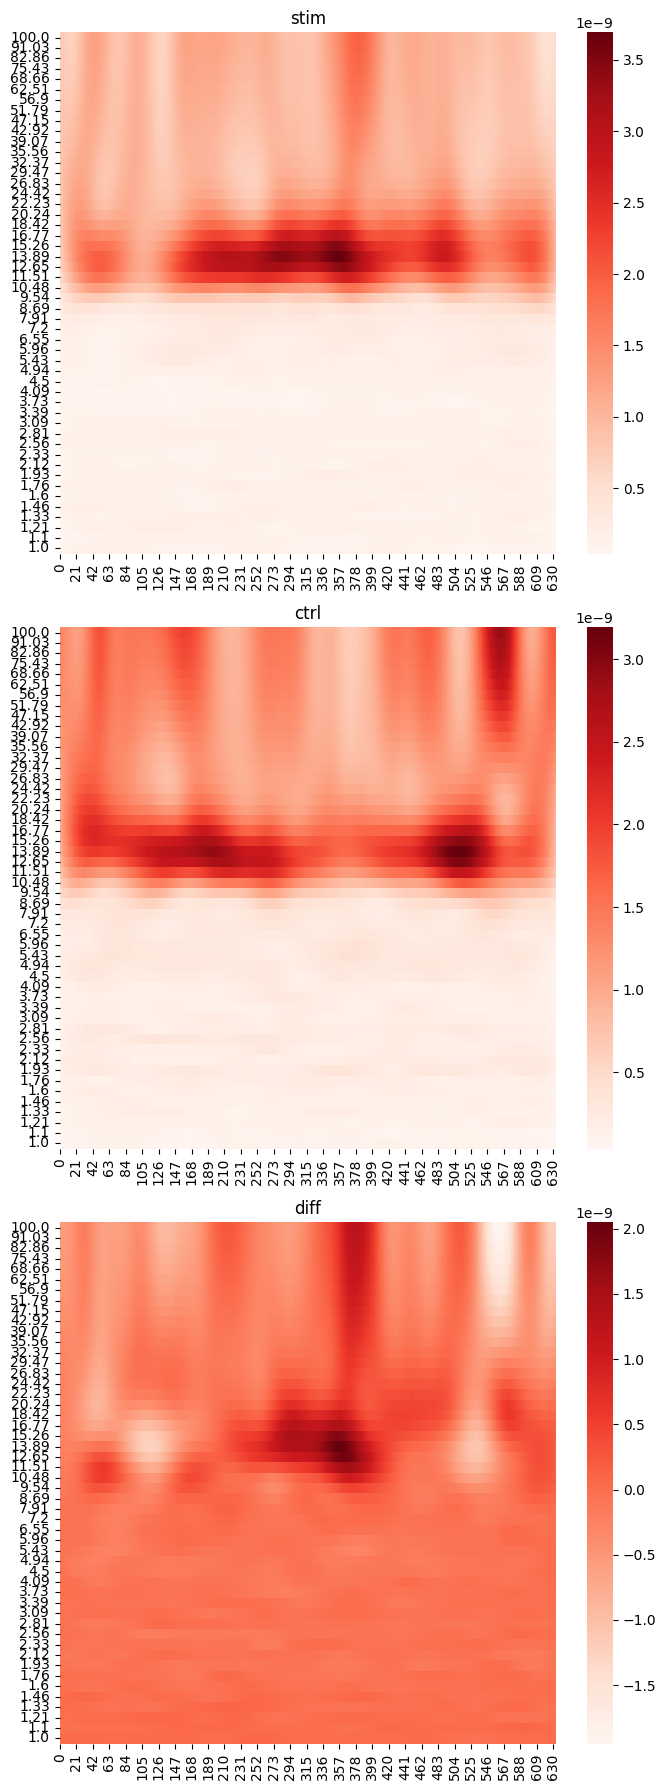

In [19]:
cnd = cond_dict['FC6']['avg']
ctr = ctrl_dict['FC6']['avg']
diff = get_diff(cnd, ctr)

In [26]:
# step 2: zscoring and thresholding

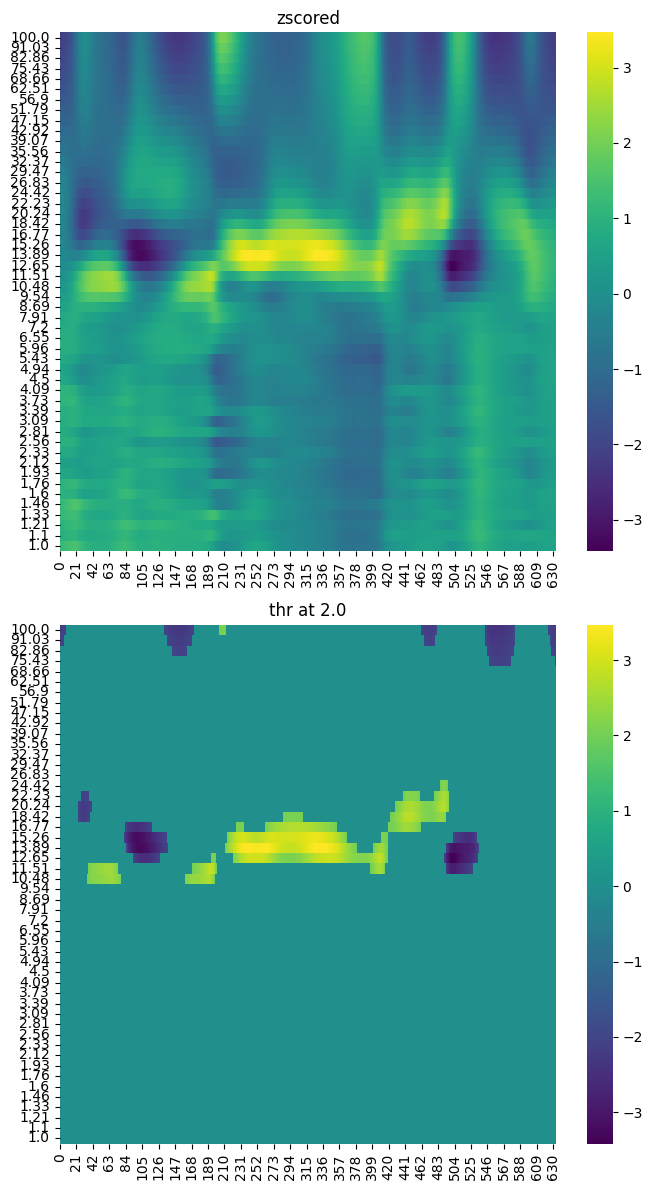

In [35]:
t = zscore(diff)
thr = 2.0
t_thr = t.copy()
t_thr[np.abs(t_thr)<thr] = 0
fig, ax = plt.subplots(nrows=2, figsize=(7, 12))
sns.heatmap(t, cmap='viridis', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[0])#, center=0)
ax[0].set_title('zscored')

sns.heatmap(t_thr, cmap='viridis', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[1])#, center=0)
ax[1].set_title(f'thr at {thr}');
plt.tight_layout()



In [43]:
def zscore_and_thresh(diff, thr=2.0):
    t = zscore(diff)
    t_thr = t.copy()
    t_thr[np.abs(t_thr)<thr] = 0
    fig, ax = plt.subplots(nrows=2, figsize=(8, 14))
    sns.heatmap(t, cmap='viridis', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[0])#, center=0)
    ax[0].set_title('zscored')

    sns.heatmap(t_thr, cmap='viridis', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[1])#, center=0)
    ax[1].set_title(f'thr at {thr}');
    plt.tight_layout()
    
    return t

array([[-2.15720944, -2.14495889, -2.13060803, ..., -2.17783578,
        -2.19719452, -2.21553725],
       [-2.08308099, -2.07181634, -2.05863117, ..., -2.12290186,
        -2.13997062, -2.15611883],
       [-1.99748939, -1.98734254, -1.97548372, ..., -2.05855284,
        -2.07301253, -2.08666106],
       ...,
       [ 0.98344955,  0.99262336,  1.00240898, ...,  0.48617038,
         0.49101855,  0.49555435],
       [ 0.9431755 ,  0.94798803,  0.95316222, ...,  0.5919856 ,
         0.59108142,  0.59026947],
       [ 1.19225723,  1.20497953,  1.21815206, ...,  0.58513038,
         0.58676832,  0.58831669]])

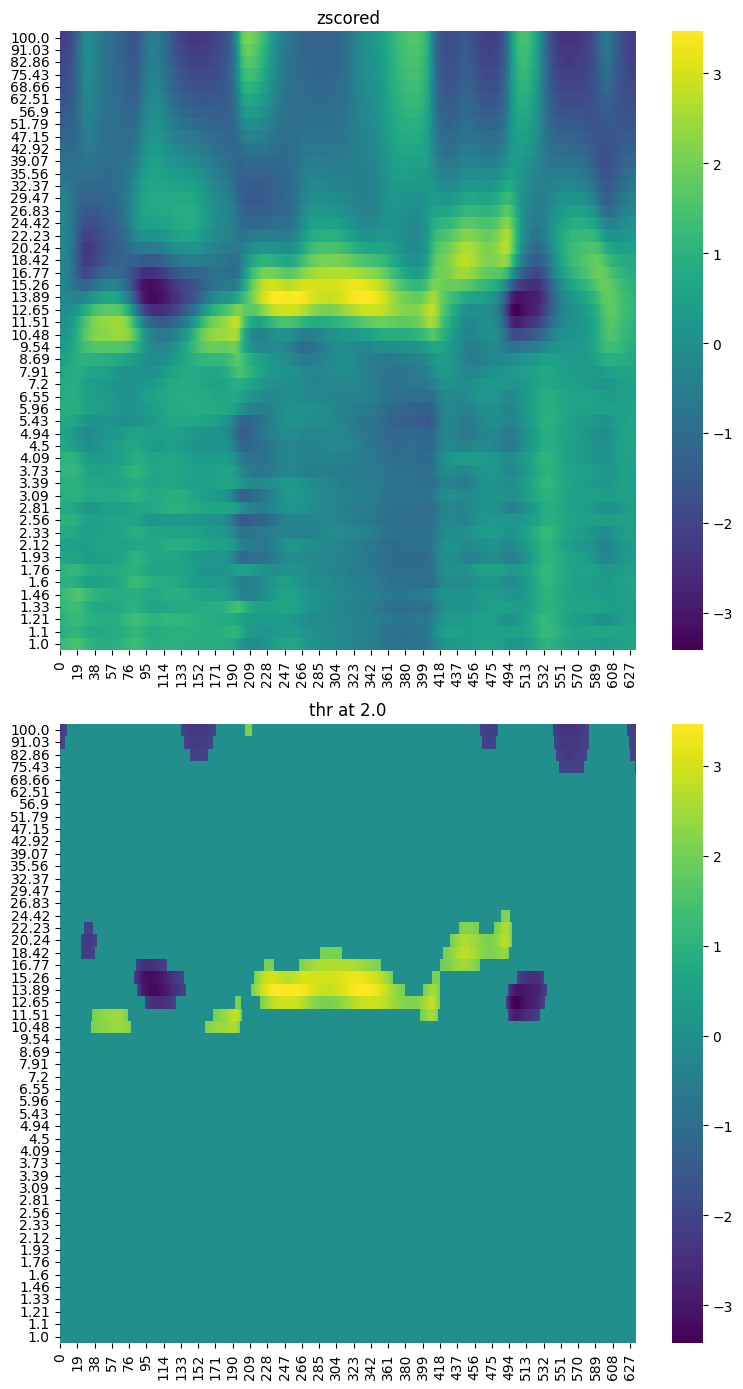

In [44]:
zscore_and_thresh(diff)

## The permutation bit

In [47]:
# From Davide
from scipy.stats import norm
from scipy import stats
from numpy.random import shuffle
nPerms= 1000 # umber of perm
pval    = 0.05 #p-value threshold
sigThresh =norm.ppf(1-pval)/2 #note: two-tailed!

In [37]:
sigThresh

0.8224268134757361

In [ ]:
def do_perm_thing(mat1, mat2):

In [45]:
mat1=cnd.copy()
mat2=ctr.copy()

In [ ]:
rand_mask - 

ValueError: Must pass 2-d input. shape=()

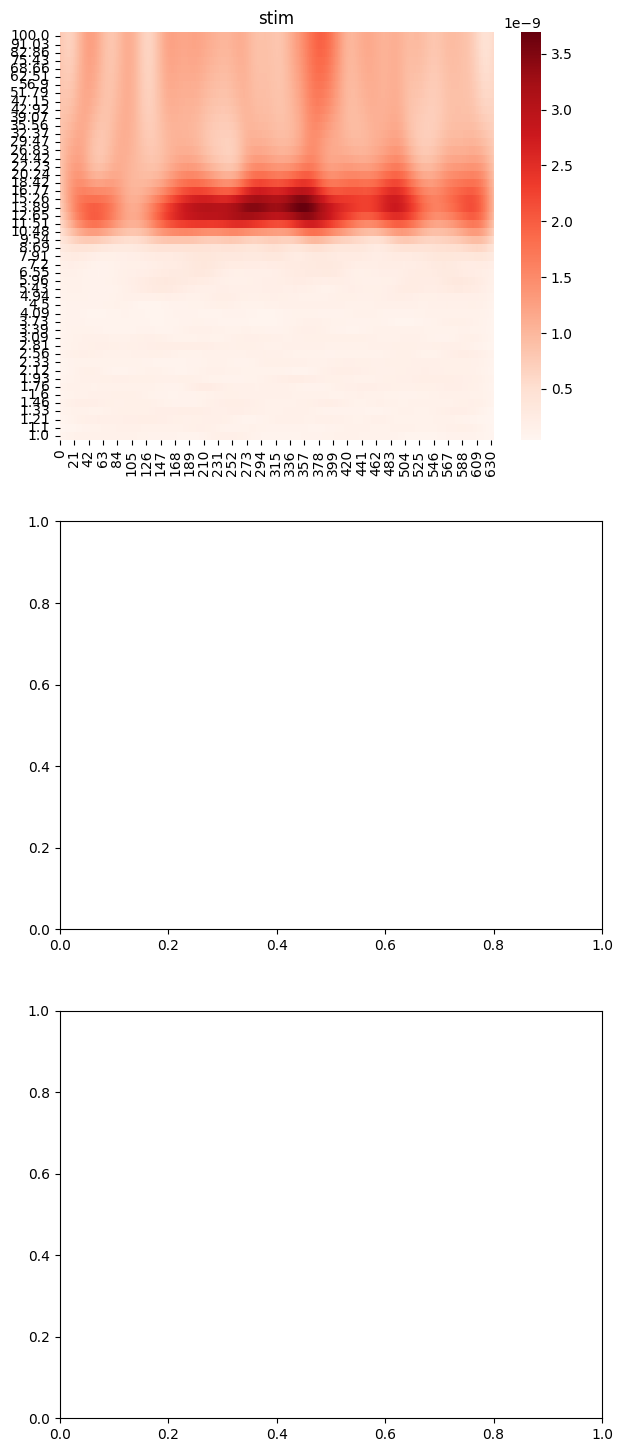

In [49]:
get_diff(mat1, shuffle(mat2.copy()))

In [50]:
t = mat2.copy()
t.shape

(50, 634)

In [61]:
d1/2 - 1

24.0

In [83]:
d1 = mat1.shape[0]
d2 = mat1.shape[1]

for i in range(int(d1/2)):
    _mask = np.hstack((np.ones(d2), np.zeros(d2)))
    shuffle(_mask)
    _mask = _mask.reshape((2, 634))
    if i==0:
        mask = _mask.copy()
    else:
        mask = np.vstack((mask, _mask))
mask.shape

(50, 634)

In [130]:
def generate_new_mask(mat1):
    d1 = mat1.shape[0]
    d2 = mat1.shape[1]

    for i in range(int(d1/2)):
        _mask = np.hstack((np.ones(d2), np.zeros(d2)))
        shuffle(_mask)
        _mask = _mask.reshape((2, 634))
        if i==0:
            mask = _mask.copy()
        else:
            mask = np.vstack((mask, _mask))
    return mask

In [286]:
mask = generate_new_mask(mat1)
mask

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.]])

In [203]:
mask = generate_new_mask(mat1)
A = B = np.zeros_like(mat1)
x,y = np.where(mask==1)
A[x,y] = mat1.copy()[x, y]
B[x,y] = mat2.copy()[x, y]
x1,y1 = np.where(mask==0)
A[x1,y1] = mat2.copy()[x1, y1]
B[x1,y1] = mat1.copy()[x1, y1]


In [204]:
A

array([[1.36105541e-09, 7.92359141e-10, 7.79595941e-10, ...,
        5.38265278e-10, 5.50839121e-10, 5.63540440e-10],
       [1.34986127e-09, 7.95264137e-10, 1.33508993e-09, ...,
        5.44697814e-10, 1.74168472e-09, 1.74343058e-09],
       [1.33689525e-09, 7.98585793e-10, 7.88371525e-10, ...,
        1.71472676e-09, 5.63137870e-10, 5.74045609e-10],
       ...,
       [6.05461251e-11, 7.28230183e-11, 7.56770564e-11, ...,
        5.31382546e-11, 7.81221791e-11, 7.48948182e-11],
       [5.90285623e-11, 6.15291802e-11, 6.40158911e-11, ...,
        4.06338970e-11, 5.66741166e-11, 5.38335725e-11],
       [7.39689026e-11, 7.71739066e-11, 8.03743148e-11, ...,
        4.58506794e-11, 5.93520350e-11, 5.69461213e-11]])

In [247]:
AA==BB

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [269]:
mask = generate_new_mask(mat1)
A = np.zeros_like(mat1)
B = np.zeros_like(mat1)
x1,y1 = np.where(mask==1)
A[x1,y1] = mat1[x1, y1].copy()
B[x1,y1] = mat2[x1, y1].copy()
print(A==B)
print(mat1==mat2)

[[ True False False ...  True False False]
 [False False  True ... False  True  True]
 [ True False False ... False  True  True]
 ...
 [ True  True  True ... False False False]
 [False  True  True ...  True  True  True]
 [False False  True ... False  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [268]:
for x,y in enumerate(mask):
    print(x,y)

0 [1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 

40 [1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.

In [266]:
B

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.76124206e-09, 0.00000000e+00],
       [1.34986127e-09, 1.34345339e-09, 1.33508993e-09, ...,
        1.73581336e-09, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.32504305e-09, ...,
        0.00000000e+00, 1.71886732e-09, 0.00000000e+00],
       ...,
       [6.99519335e-11, 7.28230183e-11, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.48948182e-11],
       [0.00000000e+00, 0.00000000e+00, 6.40158911e-11, ...,
        4.06338970e-11, 0.00000000e+00, 0.00000000e+00],
       [4.69802816e-11, 4.89724070e-11, 0.00000000e+00, ...,
        0.00000000e+00, 4.40622292e-11, 0.00000000e+00]])

In [263]:
x0,y0 = np.where(mask==0)
A[x0,y0] = mat2[x0, y0].copy()
B[x0,y0] = mat1[x0, y0].copy()
A

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


array([[8.04243982e-10, 7.92359141e-10, 1.34376414e-09, ...,
        1.75386565e-09, 1.76124206e-09, 5.63540440e-10],
       [8.05970173e-10, 7.95264137e-10, 7.83680048e-10, ...,
        1.73581336e-09, 1.74168472e-09, 1.74343058e-09],
       [1.33689525e-09, 1.33191605e-09, 7.88371525e-10, ...,
        5.52292482e-10, 1.71886732e-09, 5.74045609e-10],
       ...,
       [6.99519335e-11, 6.36709150e-11, 7.56770564e-11, ...,
        5.31382546e-11, 7.81221791e-11, 4.93572322e-11],
       [4.26031310e-11, 6.15291802e-11, 6.40158911e-11, ...,
        4.06338970e-11, 3.94853887e-11, 3.83106669e-11],
       [7.39689026e-11, 4.89724070e-11, 8.03743148e-11, ...,
        4.58506794e-11, 4.40622292e-11, 4.22697767e-11]])

In [255]:
y0==y1

array([False, False, False, ..., False, False, False])

In [291]:
def apply_perm(mat1, mat2, mask):
    
    A = np.zeros_like(mat1)
    B = np.zeros_like(mat1)
    x1,y1 = np.where(mask==1)
    A[x1,y1] = mat1[x1, y1].copy()
    B[x1,y1] = mat2[x1, y1].copy()
    x0,y0 = np.where(mask==0)
    A[x0,y0] = mat2[x0, y0].copy()
    B[x0,y0] = mat1[x0, y0].copy()
    
    _A = A.ravel()
    shuffle(_A)
    A = _A.reshape(mat1.shape)
    
    _B = B.ravel()
    shuffle(_B)
    B = _B.reshape(mat1.shape)

    return A, B

In [292]:
mask = generate_new_mask(mat1)
AA, BB = apply_perm(mat1, mat2, mask)

array([[ 1.37943352e-02,  4.14211027e-01, -2.61088169e-02, ...,
        -8.62912028e-01,  5.43968008e-01, -6.96513369e-02],
       [ 1.09566881e+00, -1.26268395e+00,  2.93598078e-01, ...,
         1.55884147e-02,  4.96251983e-01, -8.11363761e-01],
       [-1.17738464e-01, -1.56341894e+00, -9.33459441e-01, ...,
        -7.98826557e-01, -1.00956836e+00, -2.82933777e-01],
       ...,
       [-1.72026447e-02, -1.28880458e+00,  2.00026743e-02, ...,
        -1.59043055e+00,  2.04608498e+00, -3.72472401e-02],
       [ 5.51518563e-01, -3.35848169e-02,  5.77833620e-04, ...,
         9.73606204e-01, -4.42973010e-01, -4.29181948e-01],
       [-1.44505373e-01,  4.70238982e-02, -1.05706214e+00, ...,
         2.97374668e-01, -5.08872233e-01, -2.54125056e+00]])

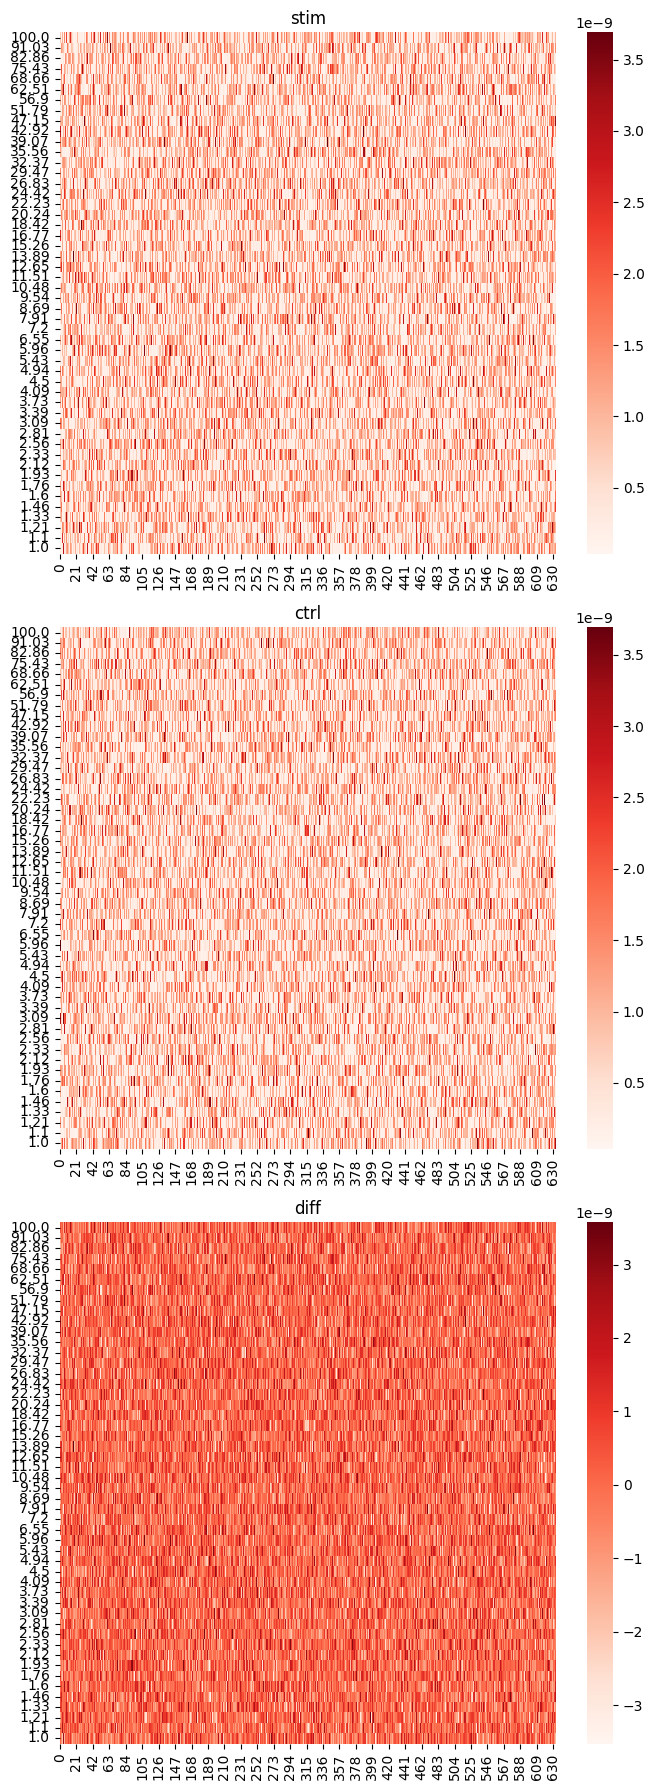

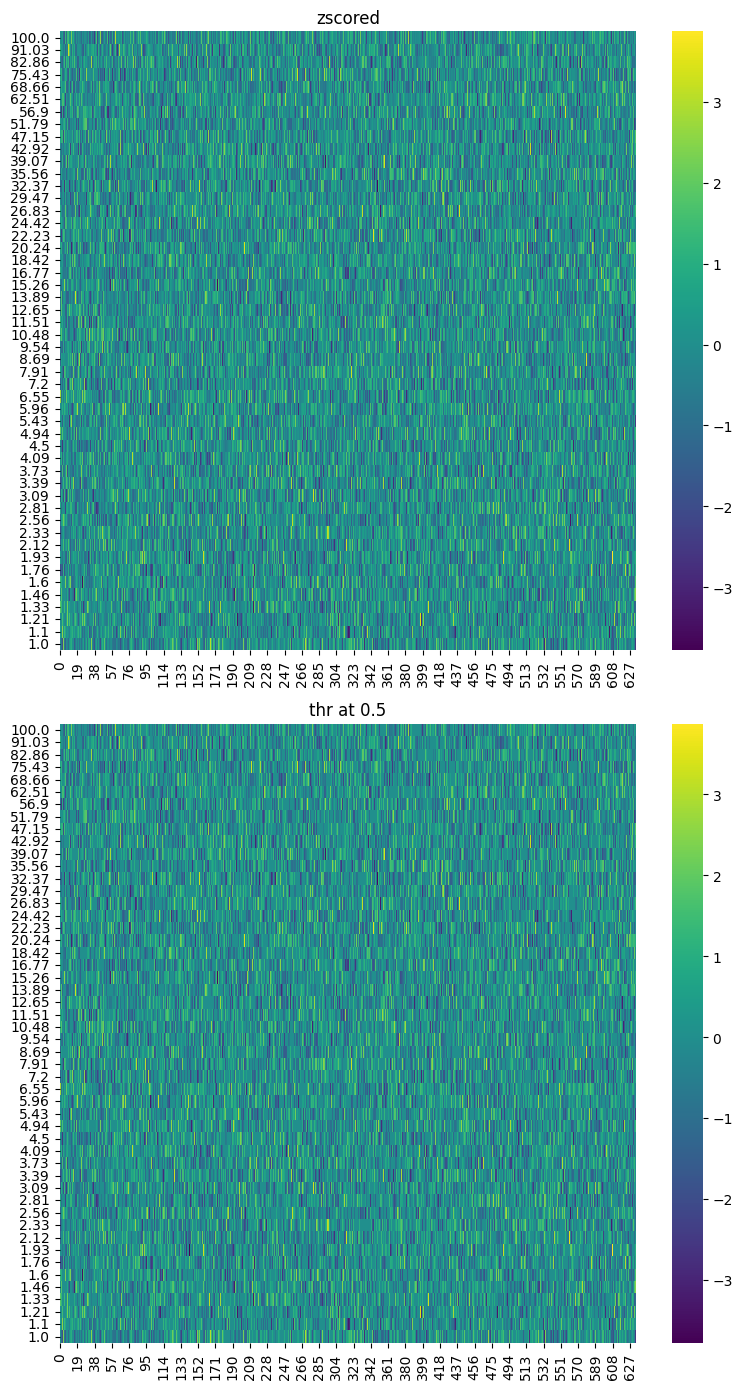

In [293]:
zscore_and_thresh(get_diff(AA, BB), thr=0.5)

In [160]:
B

array([[1.36105541e-09, 1.35341422e-09, 1.34376414e-09, ...,
        1.75386565e-09, 1.76124206e-09, 1.76437885e-09],
       [1.34986127e-09, 1.34345339e-09, 1.33508993e-09, ...,
        1.73581336e-09, 1.74168472e-09, 1.74343058e-09],
       [1.33689525e-09, 1.33191605e-09, 1.32504305e-09, ...,
        1.71472676e-09, 1.71886732e-09, 1.71901417e-09],
       ...,
       [6.99519335e-11, 7.28230183e-11, 7.56770564e-11, ...,
        8.13533172e-11, 7.81221791e-11, 7.48948182e-11],
       [5.90285623e-11, 6.15291802e-11, 6.40158911e-11, ...,
        4.06338970e-11, 3.94853887e-11, 3.83106669e-11],
       [4.69802816e-11, 4.89724070e-11, 5.09555641e-11, ...,
        4.58506794e-11, 4.40622292e-11, 4.22697767e-11]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

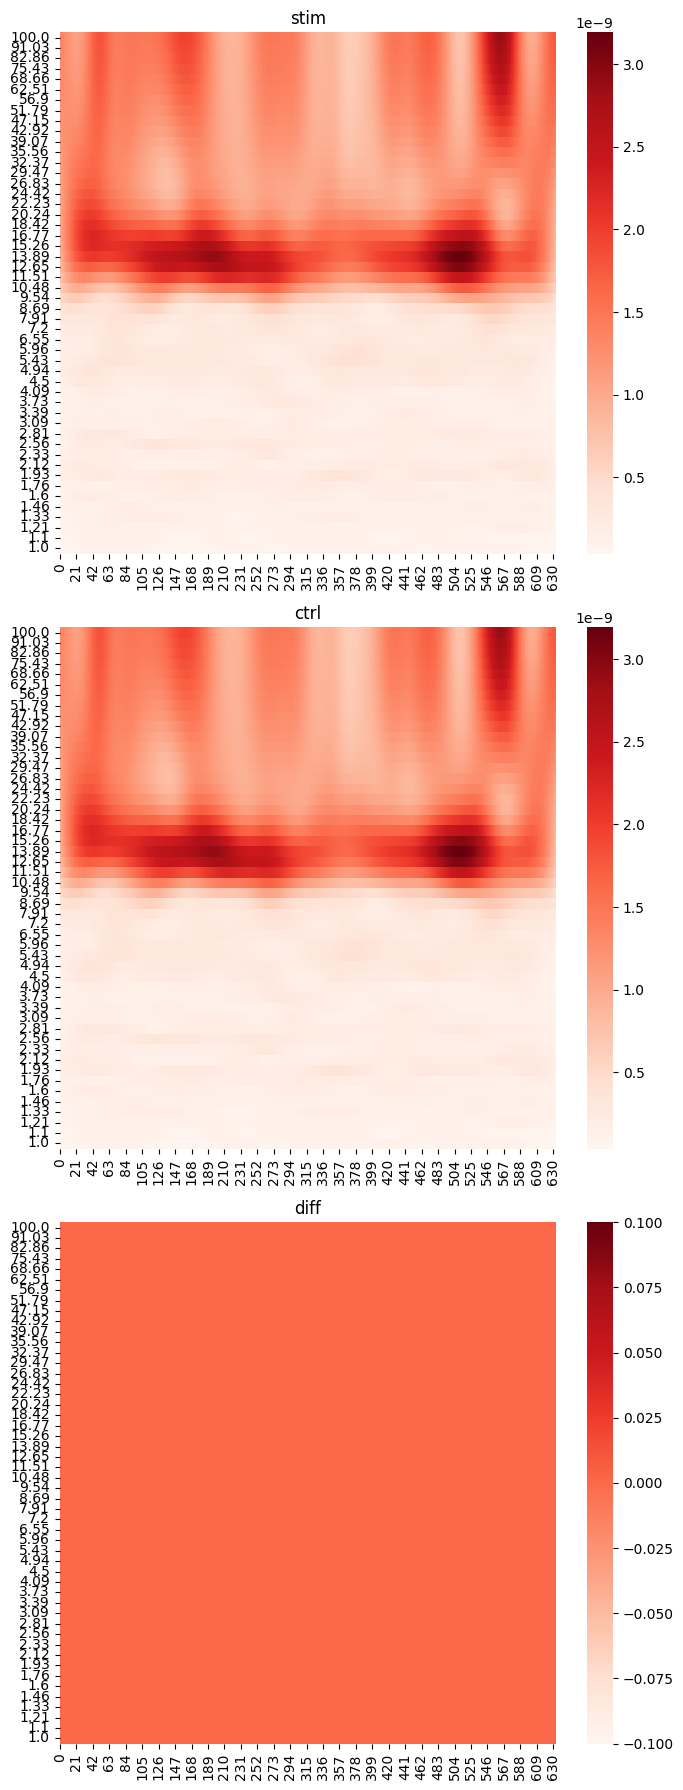

In [155]:
get_diff(AA, BB)

In [151]:

A = B = np.zeros_like(mat1)
x,y = np.where(mask==1)
A[x, y] = mat1.copy()[x, y]
B[x, y] = mat2.copy()[x, y]

x,y = np.where(mask==0)
B[x, y] = mat1.copy()[x, y]
A[x, y] = mat2.copy()[x, y]

In [154]:
y


array([  0,   1,   2, ..., 625, 628, 633])

In [ ]:
Ap = mat1.copy()

In [93]:
mask.astype(bool).shape

(50, 634)

In [92]:
mat1[mask.astype(bool)].shape

(15850,)

In [97]:
Ap = np.ones_like(mat1) *3
Ap

array([[3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       ...,
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.]])

In [99]:
np.ma.masked_where(mask, Ap)

masked_array(
  data=[[--, --, --, ..., 3.0, 3.0, --],
        [--, 3.0, 3.0, ..., 3.0, --, 3.0],
        [3.0, 3.0, --, ..., --, 3.0, 3.0],
        ...,
        [3.0, --, --, ..., 3.0, 3.0, --],
        [--, --, --, ..., --, --, 3.0],
        [3.0, --, --, ..., 3.0, 3.0, --]],
  mask=[[ True,  True,  True, ..., False, False,  True],
        [ True, False, False, ..., False,  True, False],
        [False, False,  True, ...,  True, False, False],
        ...,
        [False,  True,  True, ..., False, False,  True],
        [ True,  True,  True, ...,  True,  True, False],
        [False,  True,  True, ..., False, False,  True]],
  fill_value=1e+20)

In [110]:
x,y = np.where(mask==1)
Ap[x, y] = mat1[x, y]

x,y = np.where(mask==0)
Ap[x, y] = mat2[x, y]

In [114]:
Ap

array([[8.04243982e-10, 7.92359141e-10, 7.79595941e-10, ...,
        1.75386565e-09, 1.76124206e-09, 5.63540440e-10],
       [8.05970173e-10, 1.34345339e-09, 1.33508993e-09, ...,
        1.73581336e-09, 5.56475698e-10, 1.74343058e-09],
       [1.33689525e-09, 1.33191605e-09, 7.88371525e-10, ...,
        5.52292482e-10, 1.71886732e-09, 1.71901417e-09],
       ...,
       [6.99519335e-11, 6.36709150e-11, 6.68541085e-11, ...,
        8.13533172e-11, 7.81221791e-11, 4.93572322e-11],
       [4.26031310e-11, 4.45256898e-11, 4.64636712e-11, ...,
        5.95821754e-11, 5.66741166e-11, 3.83106669e-11],
       [4.69802816e-11, 7.71739066e-11, 8.03743148e-11, ...,
        4.58506794e-11, 4.40622292e-11, 5.69461213e-11]])

In [74]:
pip install random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
Note: you may need to restart the kernel to use updated packages.


In [76]:
from numpy.random import Generator

In [ ]:
Generator.permutation()

In [388]:
def contiguous_regions(condition):
    """Finds contiguous True regions of the boolean array "condition". Returns
    a 2D array where the first column is the start index of the region and the
    second column is the end index."""
    # Find the indicies of changes in "condition"
    d = np.diff(condition)
    idx, = d.nonzero()
    # We need to start things after the change in "condition". Therefore,
    # we'll shift the index by 1 to the right.
    idx += 1
    if condition[0]:
        # If the start of condition is True prepend a 0
        idx = np.r_[0, idx]
    if condition[-1]:
        # If the end of condition is True, append the length of the array
        idx = np.r_[idx, condition.size] # Edit
    # Reshape the result into two columns
    idx.shape = (-1,2)
    return idx

In [8]:
from scipy.stats import norm
from scipy import stats
from random import shuffle
nPerms= 1000 # umber of perm
pval    = 0.05 #p-value threshold
sigThresh =norm.ppf(1-pval)#note: two-tailed!

_diff = zscore(diff)
_diff[np.abs(_diff)<sigThresh] = 0
_diff = _diff !=0

NameError: name 'diff' is not defined

In [392]:
clusters = contiguous_regions(_diff.ravel())

In [9]:
sigThresh

1.6448536269514722

In [345]:
d = np.diff(_diff)

In [348]:
idx=d.nonzero()
idx

(array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
         2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
         6,  6,  7,  7,  8,  8, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15,
        15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
        18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
        22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24,
        24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27,
        28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31,
        32, 32, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36,
        37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 40, 40, 40,
        40, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44,
        44, 44, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47,
        48, 48, 48, 48, 48, 48, 48, 49, 49, 49]),
 array([196, 228, 361, 404, 500, 521, 

<AxesSubplot: >

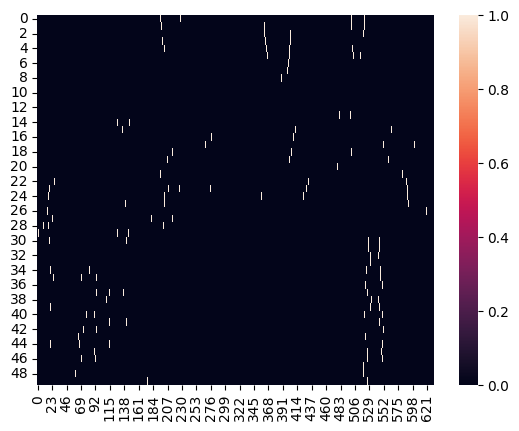

In [347]:
sns.heatmap(d)

In [343]:
_diff

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

<AxesSubplot: >

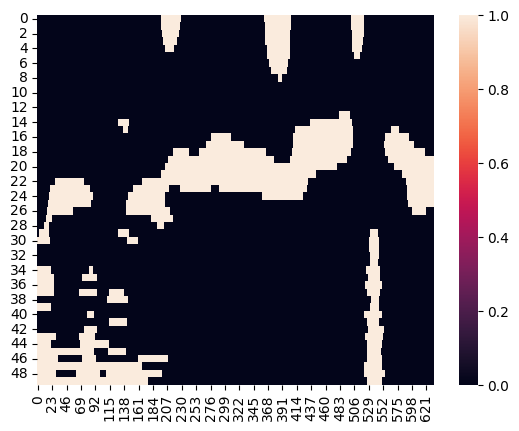

In [344]:
sns.heatmap(_diff)

In [341]:
clusters = contiguous_regions(_diff.ravel())

TypeError: can only concatenate tuple (not "int") to tuple

In [340]:
%debug


> /tmp/ipykernel_30711/3645917904.py(10)contiguous_regions()
      8     # We need to start things after the change in "condition". Therefore,
      9     # we'll shift the index by 1 to the right.
---> 10     idx += 1
     11     if condition[0]:
     12         # If the start of condition is True prepend a 0

ipdb> idx
(array([  196,   228,   361,   404,   500,   521,   831,   861,   996,
        1038,  1134,  1155,  1466,  1493,  1630,  1671,  1769,  1788,
        2101,  2124,  2265,  2305,  2403,  2421,  2738,  2753,  2901,
        2938,  3038,  3053,  3536,  3572,  3674,  3685,  4173,  4204,
        4810,  4836,  5455,  5461,  8723,  8741,  9003,  9022,  9310,
        9377,  9645,  9654,  9921, 10013, 10074, 10086, 10421, 10452,
       10552, 10647, 10698, 10736, 11046, 11107, 11185, 11281, 11330,
       11379, 11627, 11653, 11669, 11776, 11817, 11912, 11966, 12030,
       12253, 12423, 12448, 12539, 12605, 12679, 12883, 13158, 13248,
       13313, 13510, 13758, 13896, 13947, 1397

In [316]:
d = np.diff(_diff.astype(bool))


(array([], dtype=int64), array([], dtype=int64))

In [328]:
_diff

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [335]:
_diff

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [330]:
%debug

> /tmp/ipykernel_30711/3645917904.py(10)contiguous_regions()
      8     # We need to start things after the change in "condition". Therefore,
      9     # we'll shift the index by 1 to the right.
---> 10     idx += 1
     11     if condition[0]:
     12         # If the start of condition is True prepend a 0

ipdb> idx
(array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        6,  6,  7,  7,  8,  8, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15,
       15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
       18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24,
       24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27,
       28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31,
       32, 32, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36,
 

In [296]:
diff.shape

(50, 634)

In [337]:
# for 2D mats:

prova_T0 = T0_data[0,:,:]
prova_T2 = T2_data[0,:,:]
diff = prova_T2-prova_T0
data3d = np.concatenate((prova_T0.flatten(), prova_T2.flatten()))
fake_cond = np.concatenate((np.zeros(prova_T0.shape[0] * prova_T0.shape[1]),\
                             np.ones(prova_T0.shape[0] * prova_T0.shape[1])))
permutedDiffs = np.zeros((prova_T0.shape[0], prova_T0.shape[1], nPerms)) #Initialize
for permi in range(nPerms):
    np.random.shuffle(fake_cond)  #shuffle condition label vector
    mean_1 = data3d[np.where(fake_cond==0)[0]]
    mean_2 = data3d[np.where(fake_cond==1)[0]]
    diff_fake = mean_2 - mean_1
    permutedDiffs[:, :, permi] = diff_fake.reshape((prova_T0.shape[0], prova_T0.shape[1]))
clustsizes = np.zeros(nPerms) #initialize cluster sizes from permutation
for permi in range(nPerms):
    permutedDiffs2use = permutedDiffs[:,:, permi].reshape((prova_T0.shape[0]*prova_T0.shape[1]))
    zdiffFake = stats.zscore(permutedDiffs2use) #compute z-score difference
    zdiffFake[np.abs(zdiffFake) <sigThresh] = 0 #threshold
    zdiffFake = zdiffFake.reshape((prova_T0.shape[0], prova_T0.shape[1]))
    lw, num  = ndimage.label(zdiffFake !=0)
    area = ndimage.measurements.sum(zthresh !=0, lw, index=np.arange(lw.max() + 1))
    clustsizes[permi]= np.max(area)
clustthresh = np.percentile(clustsizes, 100-pval*100)
plt.hist(clustsizes, bins='auto')  # arguments are passed to np.histogram
plt.axvline(clustthresh, color='orange')
plt.xlabel("Cluster size (time points)")
plt.ylabel("Count")

(31700,)

# Scratch

In [16]:
processed_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub22_ses00_noica-epo.fif'
epochs = mne.read_epochs(processed_dir)
epochs.plot()

Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub22_ses00_noica-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [24]:
processed_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub22_ses01_final-epo.fif'
epochs = mne.read_epochs(processed_dir)
epochs.plot()

Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub22_ses01_final-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


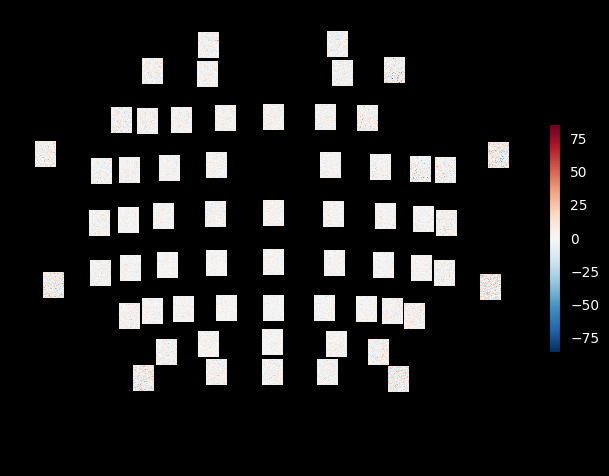

In [15]:
epochs.plot_topo_image();

In [ ]:
fname = 'sub22_ses00.pkl'
with open(save_dir+fname, 'rb') as f:
    cond_dict = pickle.load(f)


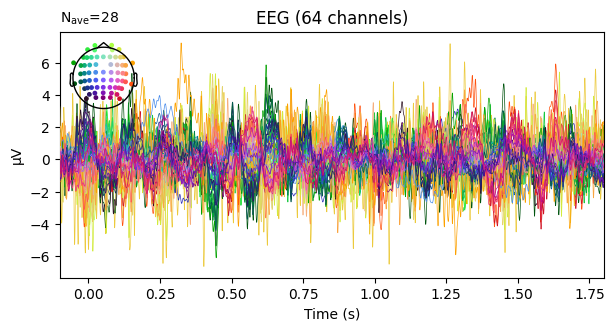

In [3]:
evoked = epochs.copy().resample().average()
evoked.plot();

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


/external/rprshnas01/kcni/moveisi/envs/course/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


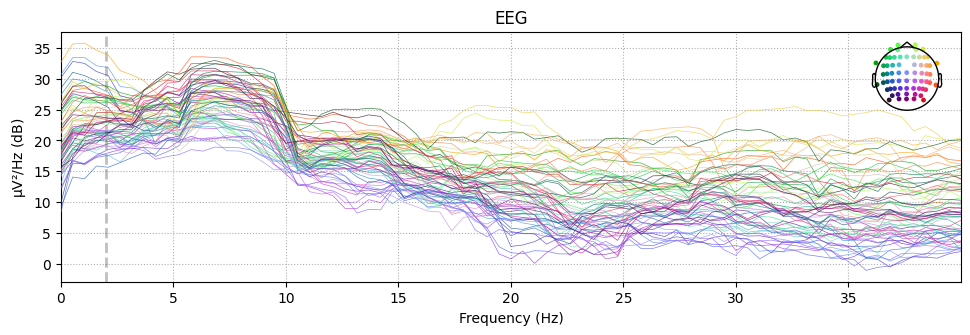

In [4]:
evoked.plot_psd(fmax=40)

In [21]:
freqs = np.logspace(*np.log10([1, 100]), num=50)
print(freqs)

[  1.           1.09854114   1.20679264   1.32571137   1.45634848
   1.59985872   1.75751062   1.93069773   2.12095089   2.32995181
   2.55954792   2.8117687    3.0888436    3.39322177   3.72759372
   4.09491506   4.49843267   4.94171336   5.42867544   5.96362332
   6.55128557   7.19685673   7.90604321   8.68511374   9.54095476
  10.48113134  11.51395399  12.64855217  13.89495494  15.26417967
  16.76832937  18.42069969  20.23589648  22.22996483  24.42053095
  26.82695795  29.47051703  32.37457543  35.56480306  39.06939937
  42.9193426   47.14866363  51.79474679  56.89866029  62.50551925
  68.6648845   75.43120063  82.86427729  91.0298178  100.        ]


In [31]:
freqs = np.logspace(*np.log10([1, 100]), num=50)
n_cycles = freqs / 2.  # different number of cycle per frequency
power = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, # wtf is n_cycle?
                        return_itc=False, decim=3, n_jobs=None,
                                          average=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   49.9s finished


Not setting metadata


In [34]:
pwr_dat = power.data
pwr_dat.shape

(28, 64, 50, 3167)

In [35]:
power.copy().pick_channels(['FC6'])

<EpochsTFR | time : [-0.100000, 1.799600], freq : [1.000000, 100.000000], epochs : 28, channels : 1, ~33.9 MB>

In [36]:
fc6_tfr=power.copy().pick_channels(['FC6']).data
fc6_tfr.shape

(28, 1, 50, 3167)

In [45]:
mne.viz.set_browser_backend('matplotlib')

Using matplotlib as 2D backend.


'qt'

In [48]:
%matplotlib inline

In [60]:
freqs

array([  1.        ,   1.09854114,   1.20679264,   1.32571137,
         1.45634848,   1.59985872,   1.75751062,   1.93069773,
         2.12095089,   2.32995181,   2.55954792,   2.8117687 ,
         3.0888436 ,   3.39322177,   3.72759372,   4.09491506,
         4.49843267,   4.94171336,   5.42867544,   5.96362332,
         6.55128557,   7.19685673,   7.90604321,   8.68511374,
         9.54095476,  10.48113134,  11.51395399,  12.64855217,
        13.89495494,  15.26417967,  16.76832937,  18.42069969,
        20.23589648,  22.22996483,  24.42053095,  26.82695795,
        29.47051703,  32.37457543,  35.56480306,  39.06939937,
        42.9193426 ,  47.14866363,  51.79474679,  56.89866029,
        62.50551925,  68.6648845 ,  75.43120063,  82.86427729,
        91.0298178 , 100.        ])

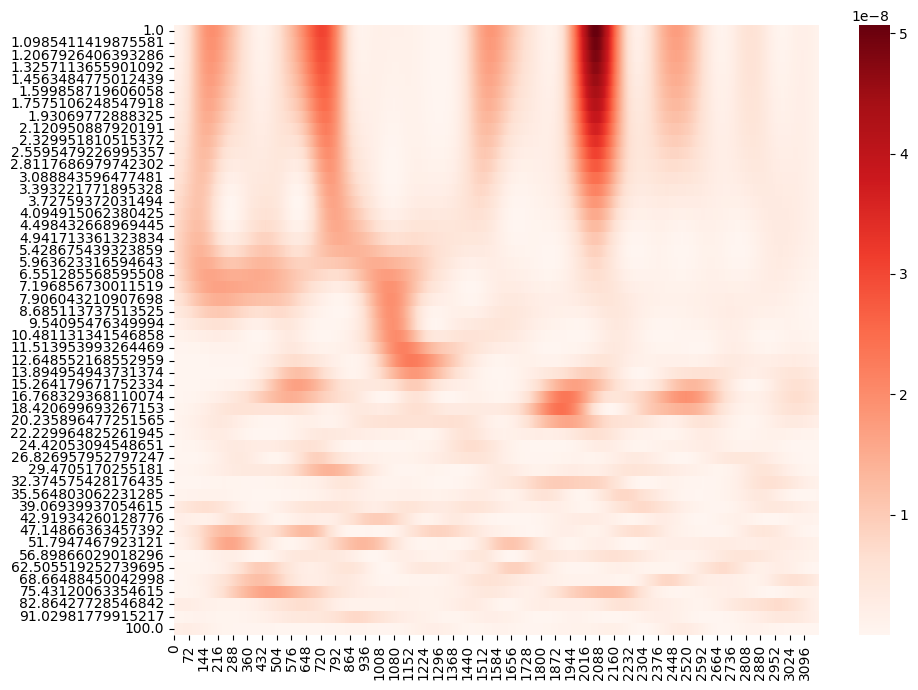

In [74]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(this_tr, cmap='Reds', ax=ax, yticklabels=freqs, square=False)
# ax.set_yticklabels(freqs[::2]);
plt.tight_layout();

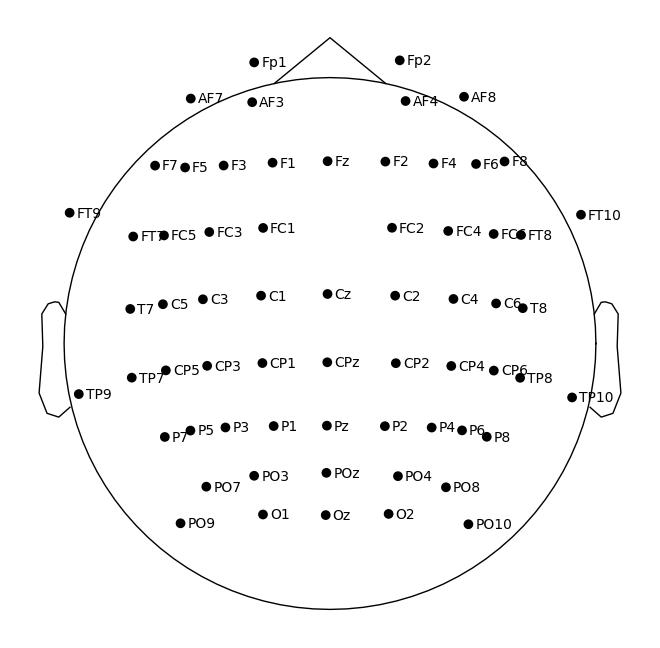

In [52]:
epochs.plot_sensors(show_names=True);

In [47]:
freqs = np.logspace(*np.log10([1, 100]), num=50)
n_cycles = freqs / 2.  # different number of cycle per frequency
power = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, # wtf is n_cycle?
                        return_itc=False, decim=3, n_jobs=None,
                                          average=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   11.8s finished


Not setting metadata


In [48]:
all_tr_tfrs = give_me_all_tfrs(power, 'FC6')
all_tr_tfrs.shape

AttributeError: 'dict' object has no attribute 'shape'

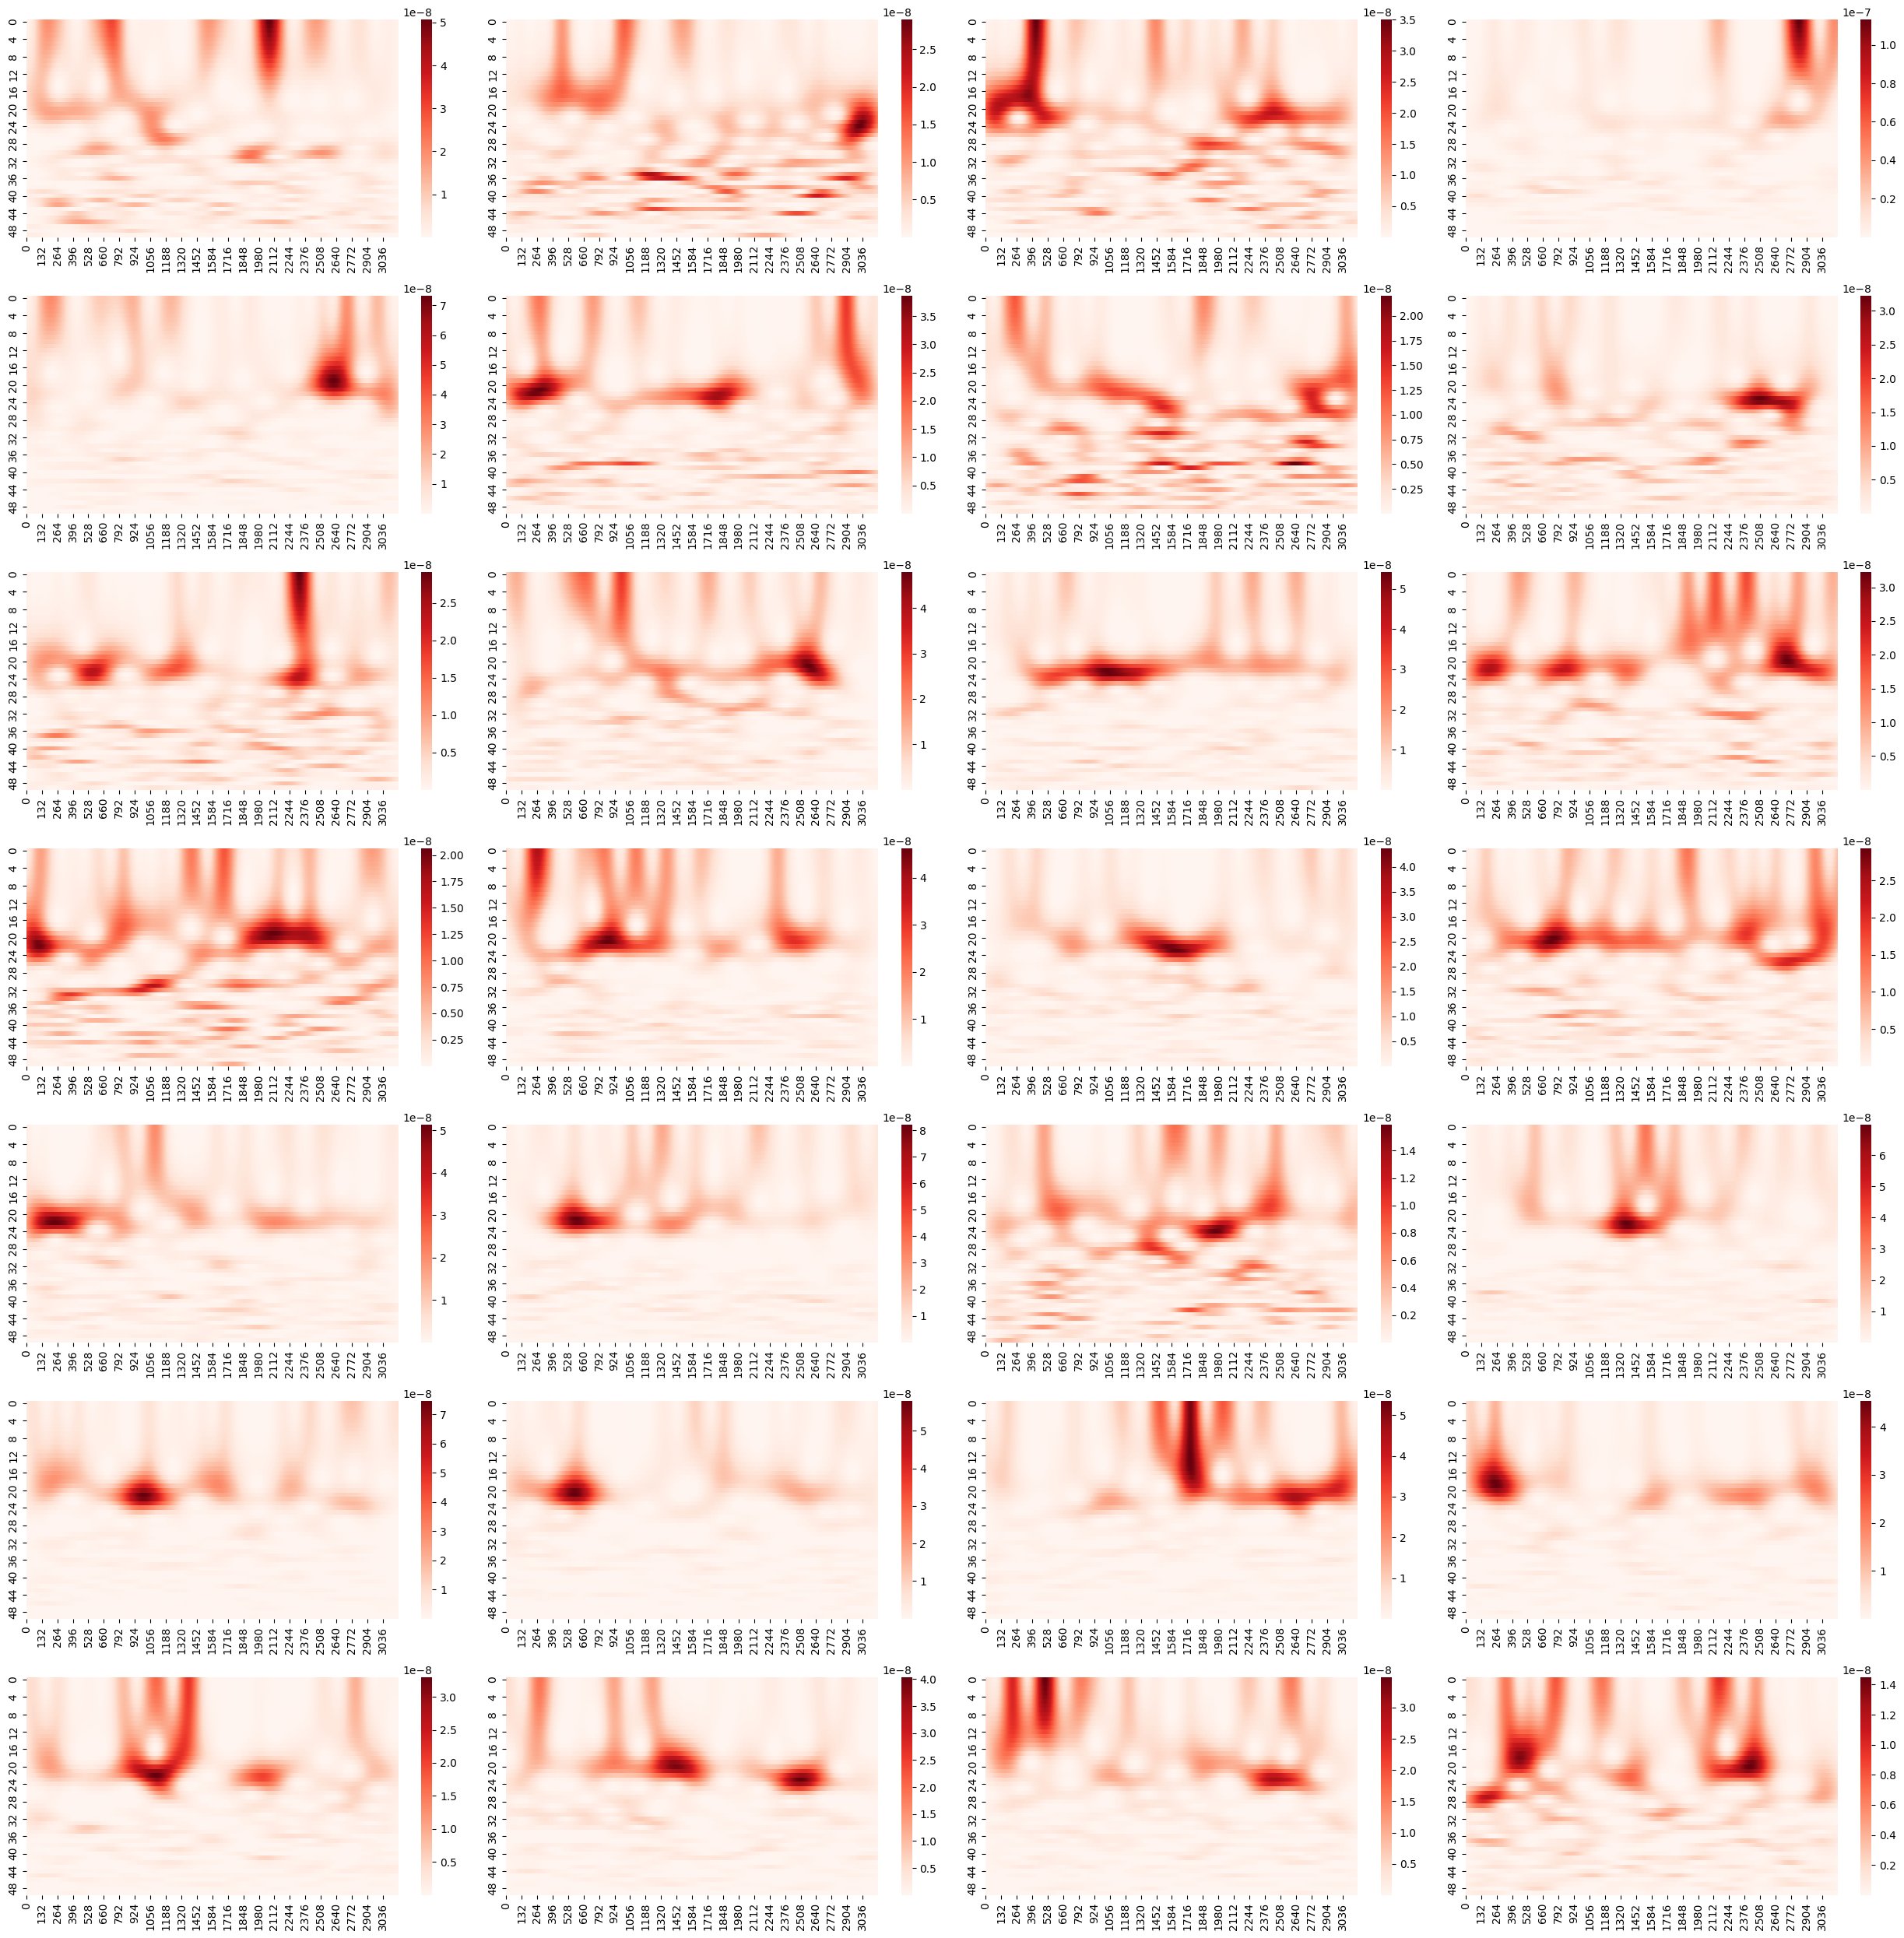

In [91]:
fig, axx = plt.subplots(nrows=7, ncols=4, figsize=(25,25))
for n, ax in enumerate(axx.ravel()):
    sns.heatmap(all_tr_tfrs[n], ax=ax, cmap='Reds')
plt.tight_layout()

<AxesSubplot: >

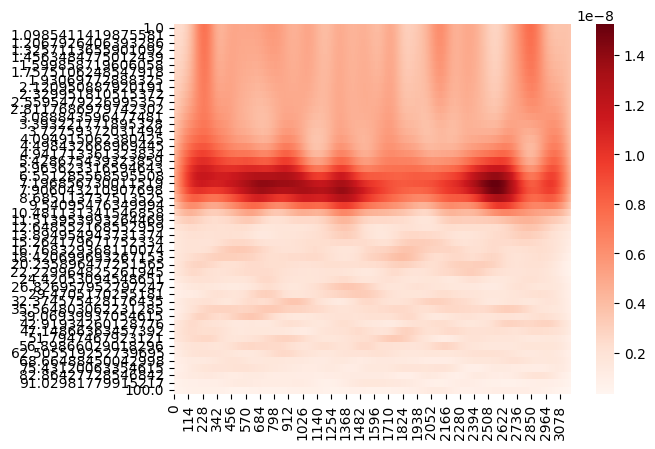

In [93]:
avg = np.zeros_like(all_tr_tfrs[0])
for n in all_tr_tfrs:
    avg += all_tr_tfrs[n]
avg = avg/len(all_tr_tfrs)
sns.heatmap(avg, cmap='Reds', yticklabels=freqs)

In [107]:
all_tr_tfrs['avg'] = avg

In [108]:
import pickle

In [110]:
save_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/permutations/'
ses_name = 'sub22_ses00' + '.pkl'

with open(save_dir+ses_name, 'wb') as f:
    pickle.dump(all_tr_tfrs, f)

In [94]:
np.around(freqs, decimals=2)

array([  1.  ,   1.1 ,   1.21,   1.33,   1.46,   1.6 ,   1.76,   1.93,
         2.12,   2.33,   2.56,   2.81,   3.09,   3.39,   3.73,   4.09,
         4.5 ,   4.94,   5.43,   5.96,   6.55,   7.2 ,   7.91,   8.69,
         9.54,  10.48,  11.51,  12.65,  13.89,  15.26,  16.77,  18.42,
        20.24,  22.23,  24.42,  26.83,  29.47,  32.37,  35.56,  39.07,
        42.92,  47.15,  51.79,  56.9 ,  62.51,  68.66,  75.43,  82.86,
        91.03, 100.  ])

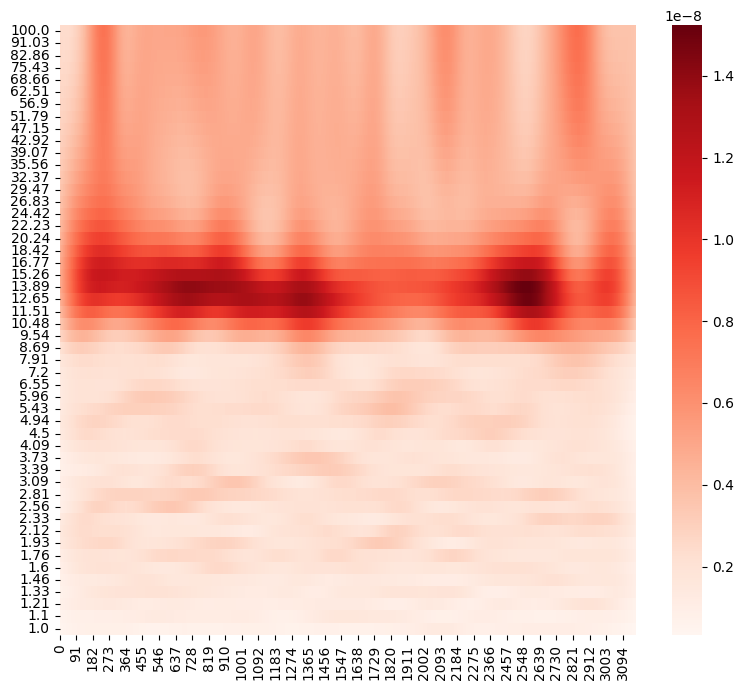

In [106]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(avg, cmap='Reds', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax)
          #  xticklabels=list(np.arange(-0.1, 1.8, 0.1)))
plt.tight_layout()